In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

### Wczytywanie danych

In [2]:
df = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
df.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
df['DESCR']

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

Z całego zbioru wybieram losowo 20 twarzy, to na nich będę przeprowadzał dalsze badania (transformacje i tym podobne).

In [5]:
import random
nrows = 400
sample = random.sample(range(nrows), 20)
faces = df['data'][sample]

### Funkcje pomocnicze

In [6]:
def draw_images(images, nrow = 5, ncol = 4):
  plt.figure(figsize=(20,15))
  plt.gray()
  for i in range(nrow*ncol):
    ax = plt.subplot(nrow, ncol, i+1)
    ax.matshow(images[i].reshape(64,64))
    plt.xticks([])
    plt.yticks([])
  plt.show()


In [7]:
def rotate_image(image):
  image = np.transpose(image.reshape(64,64)).reshape(1,64*64)
  image = image[0]
  return image

In [8]:
def lighten(image, percentage = 10):
  f = lambda x:(1+percentage/100) * x
  image = f(image)
  image[np.where(image>1)] = np.repeat(1, len(image[np.where(image>1)]))
  return image

In [9]:
def image_RMSE(org_images, images):
  rmses = []
  for i in range(len(org_images)):
    rmses.append(mean_squared_error(org_images[i], images[i], squared = False))
  return rmses

### Rysowanie twarzy

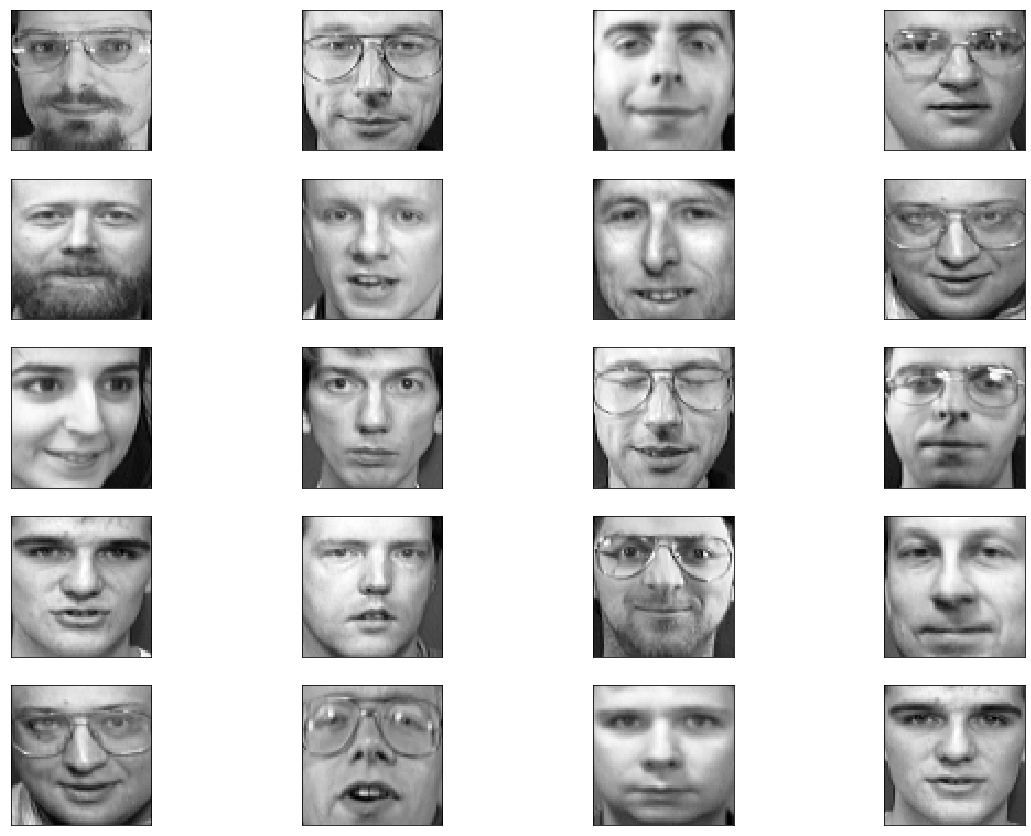

In [10]:
draw_images(faces)

### Dekompozycja PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()

In [13]:
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

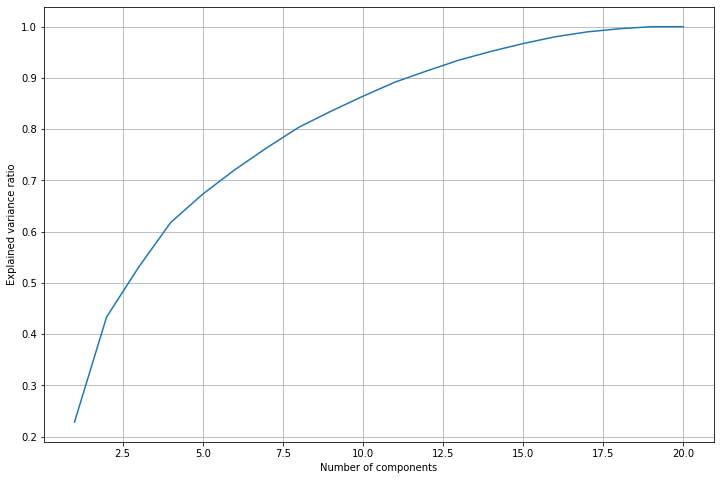

In [14]:
plt.figure(figsize=(12,8))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.grid()
plt.show()
# Wygląda na to, że dla ok. 18 komponentów już niemal cała wariancja jest wyjaśniona

In [15]:
pca = PCA(n_components=18)

In [16]:
print("Stopień kompresji: {}".format(64*64/18))

Stopień kompresji: 227.55555555555554


In [17]:
def compare(model, arg):
  data = model.fit_transform(arg)
  data = model.inverse_transform(data)
  draw_images(data)
  rmse = image_RMSE(arg, data)
  print("RMSE vectors: {}".format(rmse))
  print("Mean of pixel values: {}".format(np.mean(arg)))
  print("Mean of RMSE for custom photos: {}".format(np.mean(rmse)))
  print("Standard deviation of RMSE for custom photos: {}".format(np.std(rmse)))

In [18]:
faces_lighten = []
for i in range(20):
  faces_lighten.append(lighten(faces[i], 60))
faces_rotated = []
for i in range(20):
  faces_rotated.append(rotate_image(faces[i]))

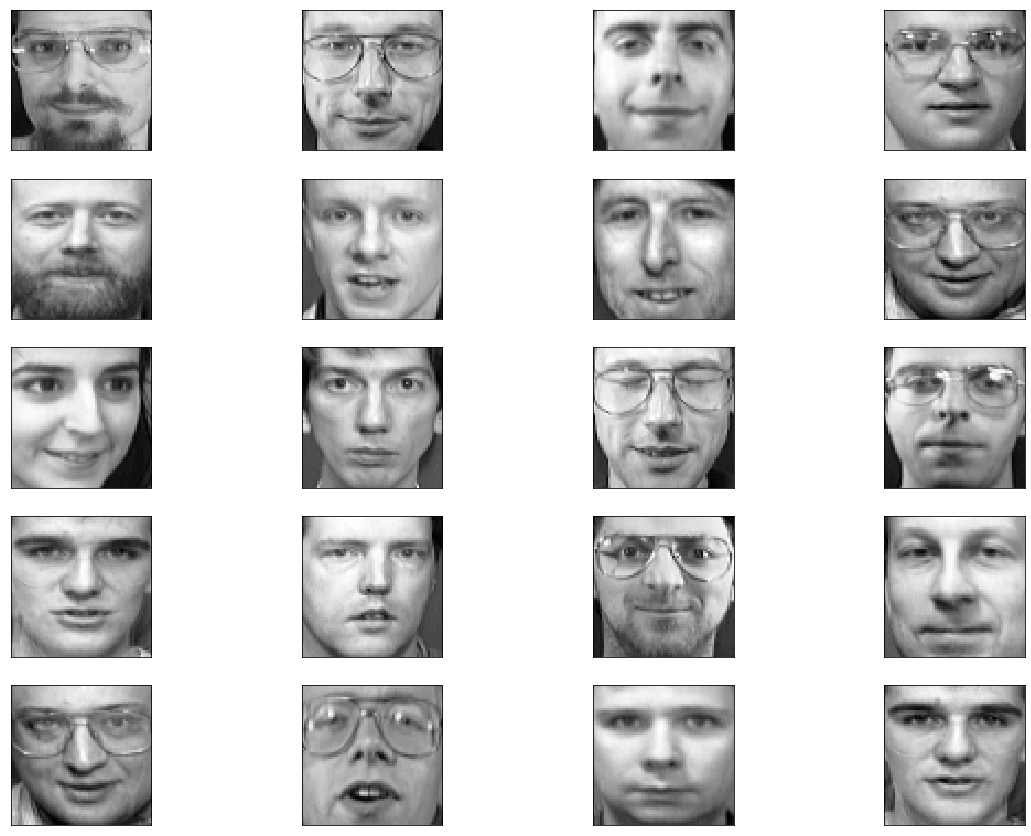

RMSE vectors: [0.0017689741, 0.00039262636, 0.00081808056, 0.0016265895, 0.0021242201, 0.0020652656, 0.00083577563, 0.015289474, 4.365882e-05, 2.2405715e-05, 0.00057316304, 0.0007807702, 0.019901678, 6.534279e-05, 0.00131022, 0.0025082503, 0.013984712, 0.0006505754, 0.006070191, 0.020430677]
Mean of pixel values: 0.5401898622512817
Mean of RMSE for custom photos: 0.004563132766634226
Standard deviation of RMSE for custom photos: 0.0066658975556492805


In [19]:
compare(pca, faces)

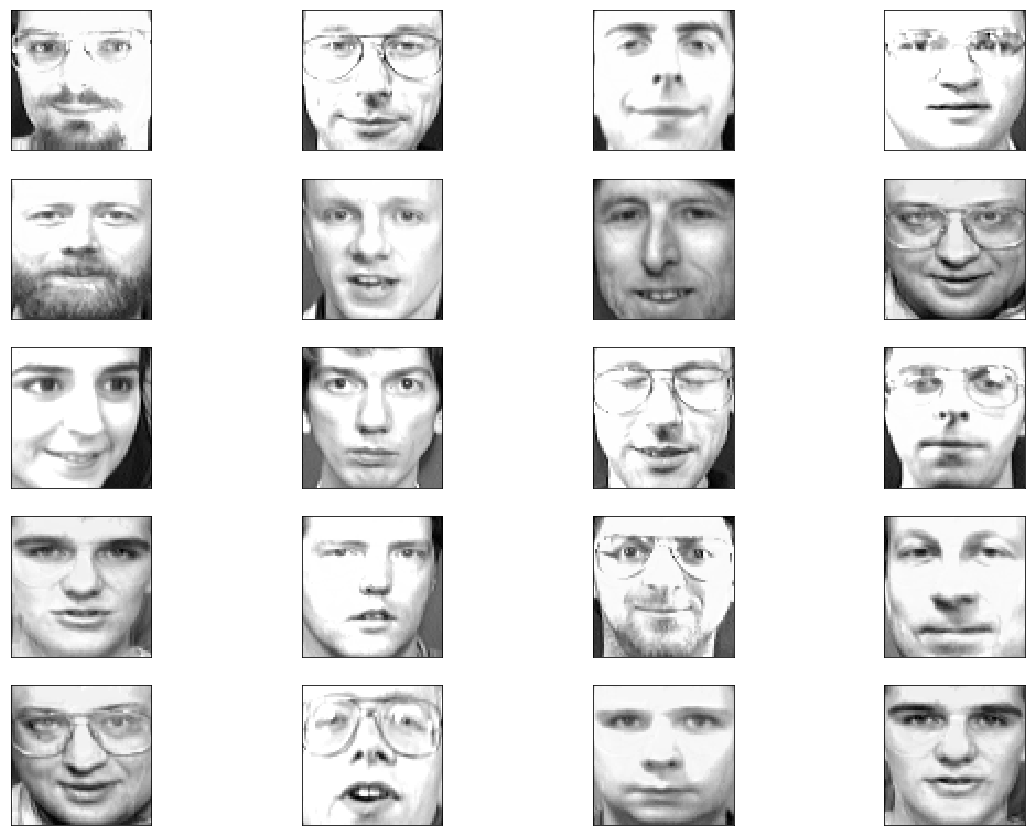

RMSE vectors: [0.002802030135837568, 0.001284680116210151, 0.0014375125128953713, 0.00041877970974430454, 0.0028395432181838164, 0.0024780382031060386, 0.0002622844124623863, 0.02013285259590441, 0.00020692795674297795, 0.00012089735451143803, 0.0013105028574789549, 0.0023931940489722793, 0.030697711497399437, 0.0010110820592440508, 0.004778336608993904, 0.0046652107995863645, 0.018806396060215825, 0.0003081257984567108, 0.00969368341475975, 0.030466449571434538]
Mean of pixel values: 0.8135436773300171
Mean of RMSE for custom photos: 0.006805711946607014
Standard deviation of RMSE for custom photos: 0.009686102781194156


In [20]:
compare(pca, faces_lighten)

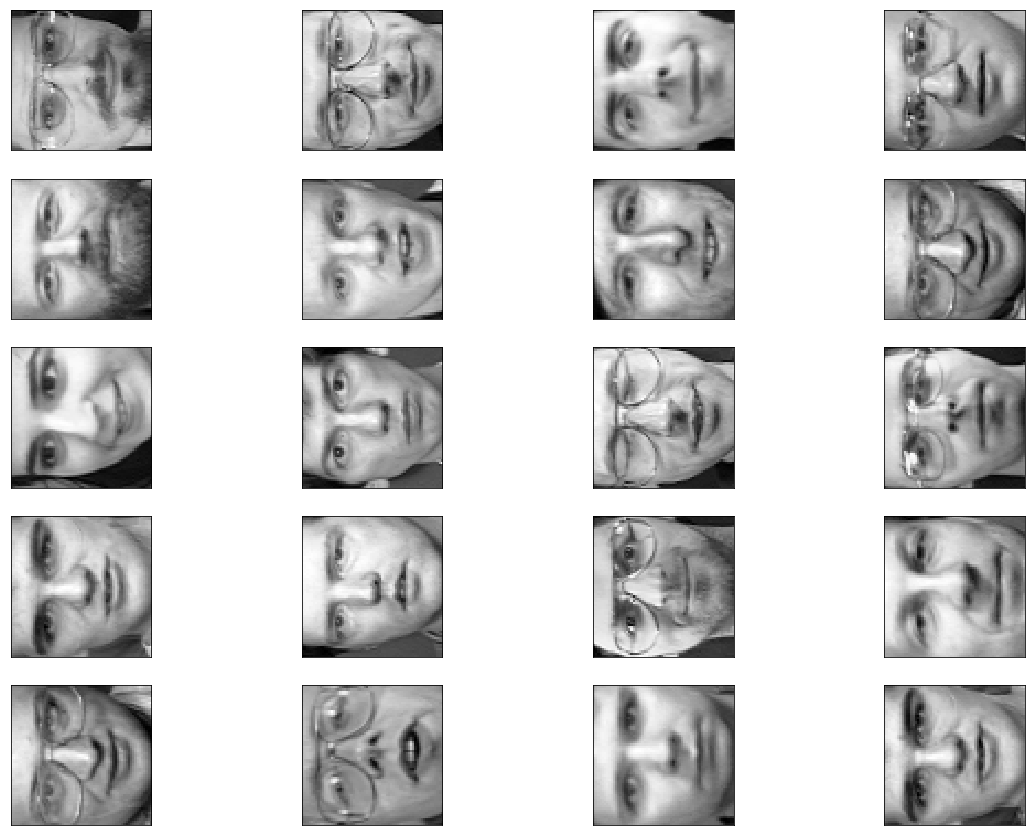

RMSE vectors: [0.0017689794066167784, 0.0003926327096665458, 0.0008180752212870632, 0.0016266100352066667, 0.0021242295937522653, 0.002065235391547843, 0.000835791747166768, 0.015289486208435996, 4.365775449577086e-05, 2.2424305107708315e-05, 0.000573182774472501, 0.0007807739261709672, 0.019901668157218062, 6.535228134156835e-05, 0.001310212523194699, 0.0025082673688839874, 0.013984725261630665, 0.0006505642903277452, 0.006070180256745332, 0.020430667343863135]
Mean of pixel values: 0.5401898622512817
Mean of RMSE for custom photos: 0.004563135827856603
Standard deviation of RMSE for custom photos: 0.006665895228035902


In [21]:
compare(pca, faces_rotated)

Wygląda na to, że błędy są zauważalne, choć niezbyt znaczące. Rosną one pod wpływem modyfikacji zdjęć.

Niestety nie znalazłem zastosowania do wykrywania anomalii